Cargar paquetes

In [1]:
%pip install numpy
%pip install matplotlib
%pip install imageio
%pip install scikit-image

%pip install opencv-python

# Ubicación teseract
# C:\Program Files\Tesseract-OCR
%pip install pytesseract

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Cargar paquetes
import cv2
import pytesseract
import matplotlib.pyplot as plt

# para uso en windows
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
placa = [] # se basa en geometrias 
image = cv2.imread('../../../URL/auto.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # la pasamos en gris

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


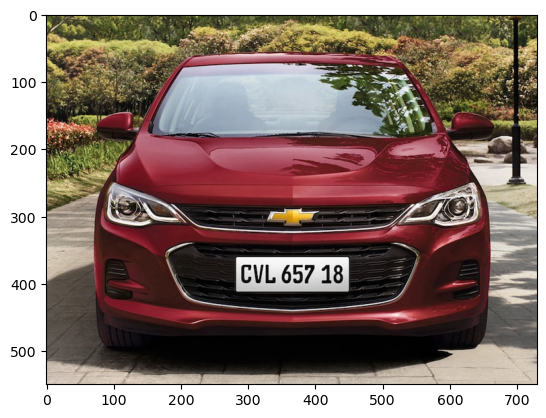

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # lo pasamos a color origianl

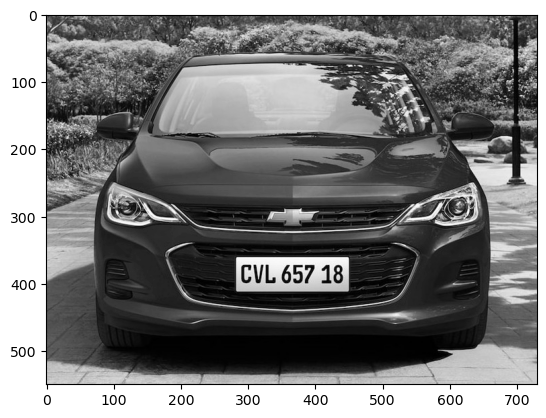

In [ ]:
plt.imshow(gray, cmap = 'gray'); #mostramos en esacala de grises

Vamos a ir aplicando muchos filtros

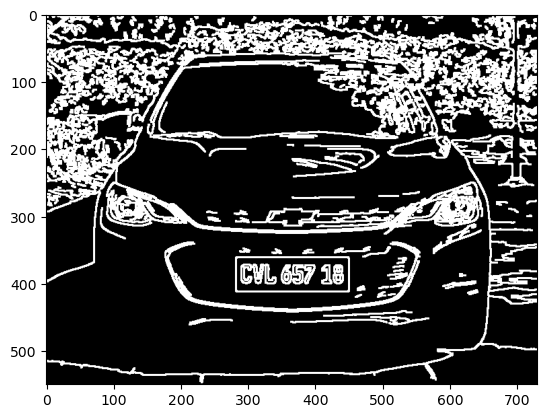

In [ ]:
gray = cv2.blur(gray, (3,3)) # el blur es difuminado y lo que hace es remplazando pixeles,
canny = cv2.Canny(gray, 130, 200) # agregamos canny
canny = cv2.dilate(canny, None, iterations=1)
plt.imshow(canny, cmap = 'gray');


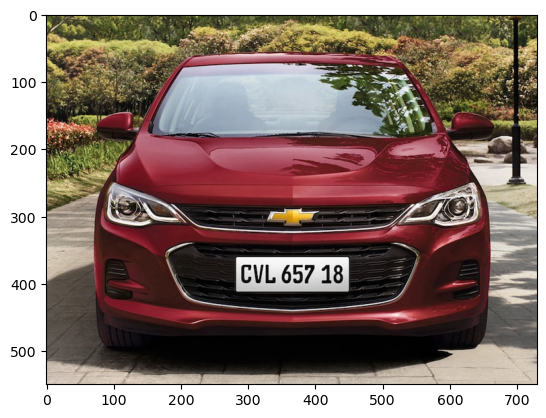

In [ ]:
# Detección de contornos con OpenCV4
contorno, _  = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
for c in contorno:
    area = cv2.contourArea(c)
    x, y, w, h = cv2.boundingRect(c)
    # cuando el contorno esta mal entonces: 
    epsilon = 0.09*cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    if len(approx) == 4 and area > 9000:
        print(f'area: {area}')
        print(f'ancho: {w}')
        print(f'altura: {h}')
        aspect_ratrio = float(w)/h
        print(aspect_ratrio)
        cv2.drawContours(image, [approx], 0, (0, 255, 0), 3)
        if aspect_ratrio > 3:
            placa = gray[y:y+h, x:x+w]
            text = pytesseract.image_to_string(placa, config = '--psm 11').strip()
            print(f'Placa: {text}')
            cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 3)
            cv2.putText(image, text, (x-20, y-10), 1, 2.2, (0, 255, 0), 2)
        

SyntaxError: unexpected EOF while parsing (3697276790.py, line 20)

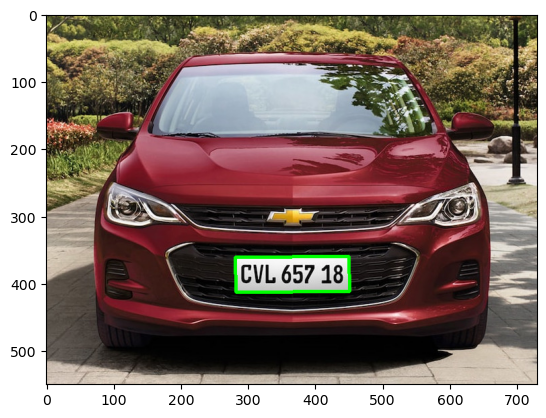

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))